# <center> FP2–V2. Mjerenje viskoznosti viskozimetrom s padajućom kuglicom
## <center> Matija Pajas

In [2]:
from scipy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#from sympy import *
#init_printing()

from IPython.display import HTML
from IPython.display import display

## Zadatak 1

Odredite viskoznost metanola kao funkcije temperature, u koracima od $5 \ \mathrm{^\circ C}$, koristeći se formulom (8).
Potrebni podaci su:
- gustoća kuglice $\rho_\mathrm{k} = 2218 \ \mathrm{kg/m^3}$
- gustoća metanola $\rho_\mathrm{meth} = 792 \ \mathrm{kg/m^3}$
- konstanta $K = (5,78 \pm 0,01) \times 10^{−8} \ \mathrm{Pa \ m^3/kg}$

Nacrtajte funkciju $\eta(T)$ za metanol

In [137]:
K = 5.78*(10**(-8))
Mk = 0.01*(10**(-8))
rho_kugla = 2218
rho_meth = 792

def eta(K,rk,rx,t):
    return K*(rk-rx)*t

def Meta(e,K,t,Mk,Mt):
    return e*np.sqrt( (Mk/K)**2 + (Mt/t)**2 )

In [164]:
t1 = [13.11, 12.74, 12.34, 12.15, 12.56]
t2 = [11.4, 11.25, 11.5, 11.15, 11.48]
t3 = [10.83, 10.53, 10.78, 10.67, 10.60]
t4 = [10.08, 10.02, 10.34, 9.86, 9.98]
t5 = [9.68, 9.59, 9.83, 9.5, 9.53]
t6 = [9.21, 8.91, 9.3, 9.43, 9.15]
t7 = [9.28, 8.84, 9.00, 8.58, 8.69]
T = [23, 28, 33, 38, 44, 50, 55]

for i in range(size(T)):
    T[i] = T[i] + 273.15

d = {"t1": t1,
     "t2": t2,
     "t3": t3,
     "t4": t4,
     "t5": t5,
     "t6": t6,
     "t7": t7}

df = pd.DataFrame(data=d,index=range(1,size(t1)+1))
df

,t1,t2,t3,t4,t5,t6,t7
1,13.11,11.40,10.83,10.08,9.68,9.21,9.28
2,12.74,11.25,10.53,10.02,9.59,8.91,8.84
3,12.34,11.50,10.78,10.34,9.83,9.30,9.00
4,12.15,11.15,10.67,9.86,9.50,9.43,8.58
5,12.56,11.48,10.60,9.98,9.53,9.15,8.69


In [157]:
means = df.mean(0)
devs = df.std(0) 
uncs = devs/sqrt(df.index.size)
print(df.index.size)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Rezultat"])
df2 = pd.DataFrame(data=[[(means[i]) for i in range(len(means))],[(uncs[i]) for i in range(len(uncs))]], index=["Srednja vrijednost","Nepouzdanost"], columns=list(means.keys()))
df2

5


,t1,t2,t3,t4,t5,t6,t7
Srednja vrijednost,12.580000,11.35600,10.682000,10.056000,9.626000,9.200000,8.878000
Nepouzdanost,0.165741,0.06772,0.055444,0.079599,0.059548,0.086487,0.122898


0.0010368788240000002 ± 1.3778100169082404e-05
0.0009359933168000001 ± 5.811834332660352e-06
0.0008804403496000001 ± 4.81700887687146e-06
0.0008288436768000002 ± 6.715656668900937e-06
0.0007934018728000001 ± 5.096472409979519e-06
0.00075828976 ± 7.248216913559028e-06
0.0007317496183999999 ± 1.0208430748897259e-05


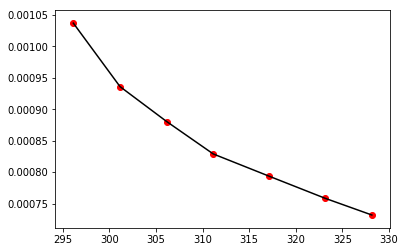

In [160]:
etas = []

for i in range(7):
    s = "t" + str(i+1)
    etas.append(eta(K,rho_kugla,rho_meth,df2[s][0]))
    
plt.plot(T,etas,color="black")
plt.scatter(T,etas, color="red")
#print(etas)

K = 5.78*(10**(-8))
Mk = 0.01*(10**(-8))
rho_kugla = 2218
rho_meth = 792

Metas = []
for i in range(size(etas)):
    s = "t" + str(i+1)
    t = df2[s][0]
    Mt = df2[s][1]
    Metas.append(Meta(etas[i],K,t,Mk,Mt))
    
for x,y in zip(etas,Metas):
    print(x,"±",y)

## Zadatak 2

Odredite viskoznost vakuumskog ulja pri sobnoj temperaturi i pri $45 \ \mathrm{^\circ C}$. Potrebni podaci su:
- gustoća kuglice $\rho_\mathrm{k} = 2218 \ \mathrm{kg/m^3}$
- gustoća vakuumskog ulja $\rho_\mathrm{ulje} = 860 \ \mathrm{kg/m^3}$
- konstanta $K = (7,79 \pm 0,03) \times 10^{−7} \ \mathrm{Pa \ m^3/kg}$

In [149]:
K = 7.79*(10**(-7))
rho_kugla = 2218
rho_ulje = 860



In [153]:
t1 = [58.17, 56.04, 55.37, 58.64, 59.13]
t2 = [19.16, 18.96, 16.54, 17.72, 20.34]

for i in range(size(t1)):
    t1[i] = 2*t1[i]
    t2[i] = 2*t2[i]

T = [22, 44]

for i in range(size(T)):
    T[i] = T[i] + 273.15

d = {"t1": t1,
     "t2": t2}

df = pd.DataFrame(data=d,index=range(1,size(t1)+1))
df

,t1,t2
1,116.34,38.32
2,112.08,37.92
3,110.74,33.08
4,117.28,35.44
5,118.26,40.68


In [154]:
means = df.mean(0)
devs = df.std(0) 
uncs = devs/sqrt(df.index.size)
print(df.index.size)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Rezultat"])
df2 = pd.DataFrame(data=[[(means[i]) for i in range(len(means))],[(uncs[i]) for i in range(len(uncs))]], index=["Srednja vrijednost","Nepouzdanost"], columns=list(means.keys()))
df2

5


,t1,t2
Srednja vrijednost,114.940000,37.088000
Nepouzdanost,1.487911,1.301777


In [155]:
etas = []

for i in range(2):
    s = "t" + str(i+1)
    etas.append(eta(K,rho_kugla,rho_ulje,df2[s][0]))
    
#plt.plot(T,etas,color="black")
#plt.scatter(T,etas, color="red")
#print(etas)

K = 7.79*(10**(-7))
Mk = 0.03*(10**(-7))
rho_kugla = 2218
rho_ulje = 860


Metas = []
for i in range(size(etas)):
    s = "t" + str(i+1)
    t = df2[s][0]
    Mt = df2[s][1]
    Metas.append(Meta(etas[i],K,t,Mk,Mt))
    
for x,y in zip(etas,Metas):
    print(x,"±",y)

0.12159295708000001 ± 0.0016422111492005967
0.039234727616 ± 0.0013853909741994132


## Zadatak 3

Prikažite rezultate za metanol u grafu $\frac{1}{T} − \log\eta$ i provjerite valjanost relacije (2). Potrebno je upotrebljavati skalu apsolutne temperature. Odredite aktivacijsku energiju $\mu$ za metanol.

In [177]:
Y = [0.0010368788240000002, 0.0009359933168000001, 
     0.0008804403496000001, 0.0008288436768000002, 
     0.0007934018728000001, 0.00075828976, 0.0007317496183999999]

for i in range(size(Y)):
    Y[i] = log(Y[i])
T = [296.15, 301.15, 306.15, 311.15, 317.15, 323.15, 328.15]

for i in range(size(T)):
    T[i] = 1/T[i]

a = 1010.7093963508239 ± 79.05631475956311
b = -10.318987185893898 ± 0.25395101276234794


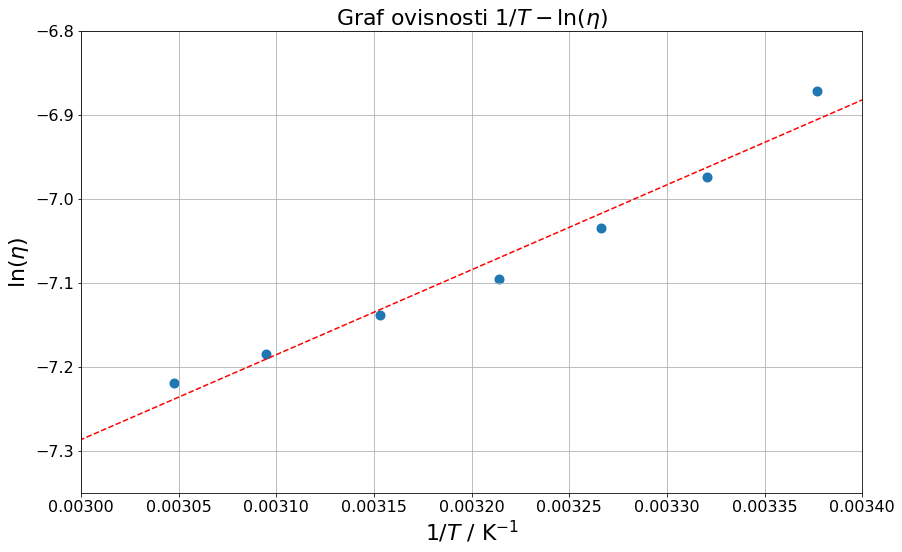

In [199]:
pars,cov=curve_fit(lambda x,a,b: a*x+b ,T,Y)

a=pars[0]
b=pars[1]

x_fit=linspace(0.002,0.004)
y_fit=a*x_fit+b

print("a =", pars[0],"±", sqrt(cov[0,0]))
print("b =",pars[1],"±", sqrt(cov[1,1]))

plt.figure(figsize=(14,8.5))
plt.scatter(T,Y,linewidth=4)
plt.grid()
plt.plot(x_fit,y_fit,color="red",linestyle="--")
plt.xlim(0.003,0.0034)
plt.ylim(-7.35,-6.8)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title(r"Graf ovisnosti $1/T - \ln(\eta)$", fontsize=22)
plt.xlabel(r"$1/T$ / $\mathrm{K^{-1}}$",fontsize=22)
plt.ylabel(r"$\ln(\eta)$",fontsize=22);